# 01 - Getting Started with the OpenAI API

Welcome to your first notebook in the OpenAI API series! 🎉  
This notebook will guide you through setting up your environment, connecting to the OpenAI API, and making your first API calls.

---

## 🧠 What is the OpenAI API?

The **OpenAI API** allows developers to access powerful language and multimodal models such as `gpt-4o` and `gpt-4o-mini`.  
You can use it for a variety of tasks:
- Text and code generation  
- Chatbots and conversation agents  
- Summarization and translation  
- Image and audio generation  
- Embeddings for search, recommendation, or clustering  

---

## 🎯 What You Will Learn

By the end of this notebook, you will:
1. Set up and authenticate using your OpenAI API key.  
2. Initialize and explore the API client.  
3. Make your first chat completion request.  
4. Try simple examples like summarization, translation, and code generation.

---

## 🧰 Prerequisites

Before running the notebook, ensure you have:
- Python 3.9+ installed  
- An active [OpenAI account](https://platform.openai.com/)  
- Your API key copied  
- A `.env` file to store the key securely

We will **always** load the API key from the `.env` file — never hardcode it in the notebook.


## 🧰 Environment Setup

Before we can use the OpenAI API, we need to:
1. **Install the required packages**  
2. **Import necessary modules**  
3. **Load the API key securely from a `.env` file**

We’ll use:
- [`openai`](https://pypi.org/project/openai/) → the official OpenAI Python client  
- [`python-dotenv`](https://pypi.org/project/python-dotenv/) → to manage environment variables securely  

---
### 🪜 Step 1 — Install Required Packages
You only need to run this once in your environment.  
If you’re using Jupyter Lab or PyCharm, you can execute the cell below directly.


In [ ]:
## Install required libraries
# !pip install openai python-dotenv

---
### 🧩 Step 2 — Import Modules
We’ll import:
- `os` → to read environment variables  
- `load_dotenv` → to load our `.env` file  
- `OpenAI` → the main API client


In [7]:
import os
from dotenv import load_dotenv
from openai import OpenAI


---
### 🔑 Step 3 — Load the API Key from `.env`

Create a `.env` file in your project folder with the following content:
```
OPENAI_API_KEY="your_api_key_here"
```

We’ll load it using `dotenv` and retrieve the key using `os.getenv()`.  
This ensures your credentials are never hard-coded into the notebook.




In [8]:
# Load environment variables
load_dotenv()

# Retrieve the API key
api_key = os.getenv("OPENAI_API_KEY")

# Sanity check (should print a masked version)
if api_key:
    print("✅ API key loaded successfully.")
else:
    print("❌ API key not found. Please check your .env file.")


✅ API key loaded successfully.


## ⚙️ Initialize the OpenAI Client

Now that our API key is loaded from the `.env` file, let’s initialize the OpenAI client.  
The `OpenAI` class provides access to all API endpoints such as:

- `chat.completions.create()` → for chat-style responses  
- `images.generate()` → for image generation  
- `audio.transcriptions.create()` → for speech-to-text  
- `embeddings.create()` → for numerical representations of text  

Once the client is initialized, we can begin interacting with the API.


In [9]:
# Initialize the OpenAI client using the API key from the environment
client = OpenAI(api_key=api_key)

# Test client creation
print("✅ OpenAI client initialized successfully!")


✅ OpenAI client initialized successfully!


At this point, the client is ready to use!  
Next, we’ll explore the available **models** — which include text, chat, image, and audio models — and learn how to choose the right one for your task.


## 🔍 Exploring Available Models

OpenAI provides multiple models for different types of tasks.  
Each model has unique capabilities, price, and latency characteristics.

Common categories include:
- **Chat models** (e.g., `gpt-4o`, `gpt-4o-mini`) → conversation, reasoning, general-purpose text  
- **Embedding models** (e.g., `text-embedding-3-small`, `text-embedding-3-large`) → numerical vector representation of text  
- **Image models** → generate or edit images  
- **Audio models** → text-to-speech or speech-to-text  

Let's list the first few models available via the API.


In [10]:
# List available models from the OpenAI API
models = client.models.list()

# Display the first 10 models with brief information
for model in models.data:
    print(f"- {model.id}")

- gpt-5-search-api
- gpt-5-search-api-2025-10-14
- dall-e-2
- gpt-4-turbo-2024-04-09
- gpt-audio
- gpt-4o-mini-tts
- gpt-4-turbo
- gpt-realtime
- gpt-realtime-2025-08-28
- gpt-4.1-mini-2025-04-14
- gpt-3.5-turbo-1106
- gpt-4-0125-preview
- gpt-4-turbo-preview
- gpt-4-0613
- gpt-4
- gpt-4.1
- gpt-4.1-2025-04-14
- text-embedding-ada-002
- dall-e-3
- gpt-4.1-nano
- gpt-3.5-turbo-instruct-0914
- o1-2024-12-17
- gpt-4.1-nano-2025-04-14
- gpt-3.5-turbo-16k
- gpt-audio-2025-08-28
- gpt-3.5-turbo-instruct
- gpt-4o-2024-11-20
- gpt-4o-2024-05-13
- gpt-4o-mini-search-preview
- gpt-4o-mini-search-preview-2025-03-11
- gpt-4o-search-preview
- omni-moderation-latest
- o1-pro
- o1-pro-2025-03-19
- gpt-4o-search-preview-2025-03-11
- text-embedding-3-small
- o4-mini-deep-research-2025-06-26
- o1-mini-2024-09-12
- o4-mini-deep-research
- codex-mini-latest
- gpt-4o-2024-08-06
- o1
- gpt-4o-mini-2024-07-18
- gpt-4o-mini
- gpt-4o-mini-audio-preview
- gpt-image-1-mini
- gpt-5-mini
- gpt-image-1
- gpt-5-mini

---
### 🧠 Understanding Model IDs

Model IDs typically follow a naming pattern:
- `gpt-4o` → Omni model, supports text + vision input, best reasoning ability.  
- `gpt-4o-mini` → Lightweight version of gpt-4o that’s faster and cheaper for everyday tasks.  
- `text-embedding-3-small` and `text-embedding-3-large` → for vector embeddings.  

You can refer to the [OpenAI Model Documentation](https://platform.openai.com/docs/models) for the latest and most accurate list.


## 💬 Your First API Call — Chat Completion

Let’s make our first real API call! 🚀

OpenAI’s `chat.completions.create()` method allows you to have a conversation-style interaction with a model.  
You provide a list of **messages**, each with a `role` and `content`.

**Message roles:**
- `system` → defines the assistant’s behavior or personality  
- `user` → represents input from the user  
- `assistant` → previous responses from the model (used in ongoing conversations)

We’ll start simple: asking the model to write a short haiku about AI and nature.


In [11]:
# Make a simple chat completion request
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant that writes poetry."},
        {"role": "user", "content": "Write a haiku about AI and nature."}
    ]
)

# Print the model's response
print(response.choices[0].message.content)


Wires meet the wild breeze,  
Silicon dreams touch the trees—  
Harmony in code.


In [12]:
response

ChatCompletion(id='chatcmpl-CaFiWE1pRscqQpe15yhAP4zKCVaGr', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Wires meet the wild breeze,  \nSilicon dreams touch the trees—  \nHarmony in code.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1762756260, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_560af6e559', usage=CompletionUsage(completion_tokens=20, prompt_tokens=29, total_tokens=49, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

---
### 🧩 How It Works

- The API receives a **list of messages** (system + user) as context.  
- The model returns one or more **choices** (possible responses).  
- The result object contains:
  - `choices` → list of generated messages  
  - `usage` → token counts (useful for tracking cost)  
  - `id` and `created` → metadata for the request  

You can access the generated text via:
```python
response.choices[0].message.content
```


---

# Modifying Personality with System Prompts

The `system` message acts like a prompt preamble — it sets the tone, behavior, and constraints of the assistant throughout the conversation.

You can:
- Change the assistant's speaking style (e.g. formal, humorous, Shakespearean)
- Impose rules (e.g. never answer questions about X)
- Assign a persona (e.g. "You are a legal research assistant.")

Let’s experiment with a Shakespearean-style chatbot!


In [13]:
response_low = client.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "system", "content": "You are an assistant that speaks like Shakespear."},
              {"role": "user", "content": "Tell me a joke about cats and dogs."}],
    temperature=0
)
print("Shakespeare tone - \n")
print(response_low.choices[0].message.content)

Shakespeare tone - 

Why, prithee, what dost thou get when a feline doth join forces with a canine in merry jest?

A purr-suit of tail-wagging mischief, where the cat doth plot and the dog doth chase, yet neither knoweth why!



### 🎯 Deterministic vs Creative Control via "temperature"

In [17]:
prompt = """Write a 1-sentence birthday wish."""


# Low top_p (more focused, safer wording)
response_low = client.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt}],
    temperature=0
)
print("Low temp - \n")
print(response_low.choices[0].message.content)



# Low top_p (more focused, safer wording)
response_high = client.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt}],
    temperature=1
)
print("High temp - \n")
print(response_high.choices[0].message.content)

Low temp - 

Wishing you a day filled with joy, laughter, and unforgettable memories on your special birthday!
High temp - 

"Happy Birthday! May your day be filled with love, laughter, and unforgettable moments that carry you joyfully into the year ahead."


### top - p (Nucleus Sampling)
 - Instead of picking from all possible tokens, the model picks from only the most likely tokens that together account for p probability.

In [18]:
prompt = "Write a creative description of a sunset in one sentence."

# Low top_p (more focused, safer wording)
response_low = client.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt}],
    top_p=0.1,   # Very restrictive
)
print("Low top_p:")
print(response_low.choices[0].message.content)

# High top_p (more creative, free-flowing)
response_high = client.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt}],
    top_p=1,   # Many possible tokens considered
)
print("\nHigh top_p:")
print(response_high.choices[0].message.content)


Low top_p:
As the sun dips below the horizon, it spills a cascade of molten gold and fiery crimson across the sky, painting the clouds with strokes of lavender and tangerine, while the world holds its breath in awe of the fleeting masterpiece.

High top_p:
The sunset unfurled a tapestry of tangerine and violet hues across the horizon, as if the sky itself were whispering a gentle lullaby to the waking stars.


| Use Case                 | Temperature | Top_p | Description |
|--------------------------|-------------|-------|-------------|
| Code Generation          | 0.2         | 0.1   | Generates code that adheres to established patterns and conventions. Output is more deterministic and focused. Useful for generating syntactically correct code. |
| Creative Writing         | 0.7         | 0.8   | Generates creative and diverse text for storytelling. Output is more exploratory and less constrained by patterns. |
| Chatbot Responses        | 0.5         | 0.5   | Generates conversational responses that balance coherence and diversity. Output is more natural and engaging. |
| Code Comment Generation  | 0.3         | 0.2   | Generates code comments that are more likely to be concise and relevant. Output is more deterministic and adheres to conventions. |
| Data Analysis Scripting  | 0.2         | 0.1   | Generates data analysis scripts that are more likely to be correct and efficient. Output is more deterministic and focused. |
| Exploratory Code Writing | 0.6         | 0.7   | Generates code that explores alternative solutions and creative approaches. Output is less constrained by established patterns. |


## 🧪 More Examples with the OpenAI API

Now that we’ve made our first request, let’s explore how the same API can perform a variety of tasks simply by changing the prompt.

We'll try:
1. 📰 **Text Summarization**
2. ❓ **Question Answering**
3. 💻 **Code Generation**
4. 🌍 **Translation**
5. 🖼️ **Image Generation**
6. 🔊 **Audio Generation**

Each example follows the same pattern — a `chat.completions.create()` call with a task-specific prompt.


### 📰 Example 1 — Text Summarization
We’ll provide a paragraph of text and ask the model to summarize it in one sentence.


In [19]:
text_to_summarize = """
Artificial intelligence (AI) has become one of the most transformative technologies of the 21st century.
It powers everything from personalized recommendations and chatbots to autonomous vehicles and scientific discoveries.
While AI promises efficiency and innovation, it also raises ethical concerns around privacy, bias, and job displacement.
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a concise assistant that summarizes text clearly."},
        {"role": "user", "content": f"Summarize this paragraph in one sentence:\n\n{text_to_summarize}"}
    ]
)

print(response.choices[0].message.content)


AI is a transformative 21st-century technology that enhances various sectors but also raises ethical concerns regarding privacy, bias, and job displacement.


### ❓ Example 2 — Question Answering
You can ask factual questions, and the model will answer based on general knowledge.


In [20]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": "Who developed the theory of general relativity?"}
    ]
)

print(response.choices[0].message.content)


The theory of general relativity was developed by Albert Einstein. He published his groundbreaking work on the theory in 1915, which describes the gravitational force as a curvature of spacetime caused by mass. General relativity has since become one of the cornerstones of modern physics.


### 💻 Example 3 — Code Generation
Let’s ask the model to generate a short Python function.


In [22]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a Python expert."},
        {"role": "user", "content": "Write a Python function that checks if a number is prime. No explanations please."}
    ]
)

print(response.choices[0].message.content)


```python
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True
```


### 🌍 Example 4 — Translation
We’ll translate English text to Spanish.


In [23]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a professional translator."},
        {"role": "user", "content": "Translate the following sentence into Spanish: 'The future of AI is bright and full of promise.'"}
    ]
)

print(response.choices[0].message.content)


El futuro de la IA es brillante y está lleno de promesas.


### 🖼️ Example 5 — Image Generation
The API can also generate images from text prompts using the `images.generate()` method.


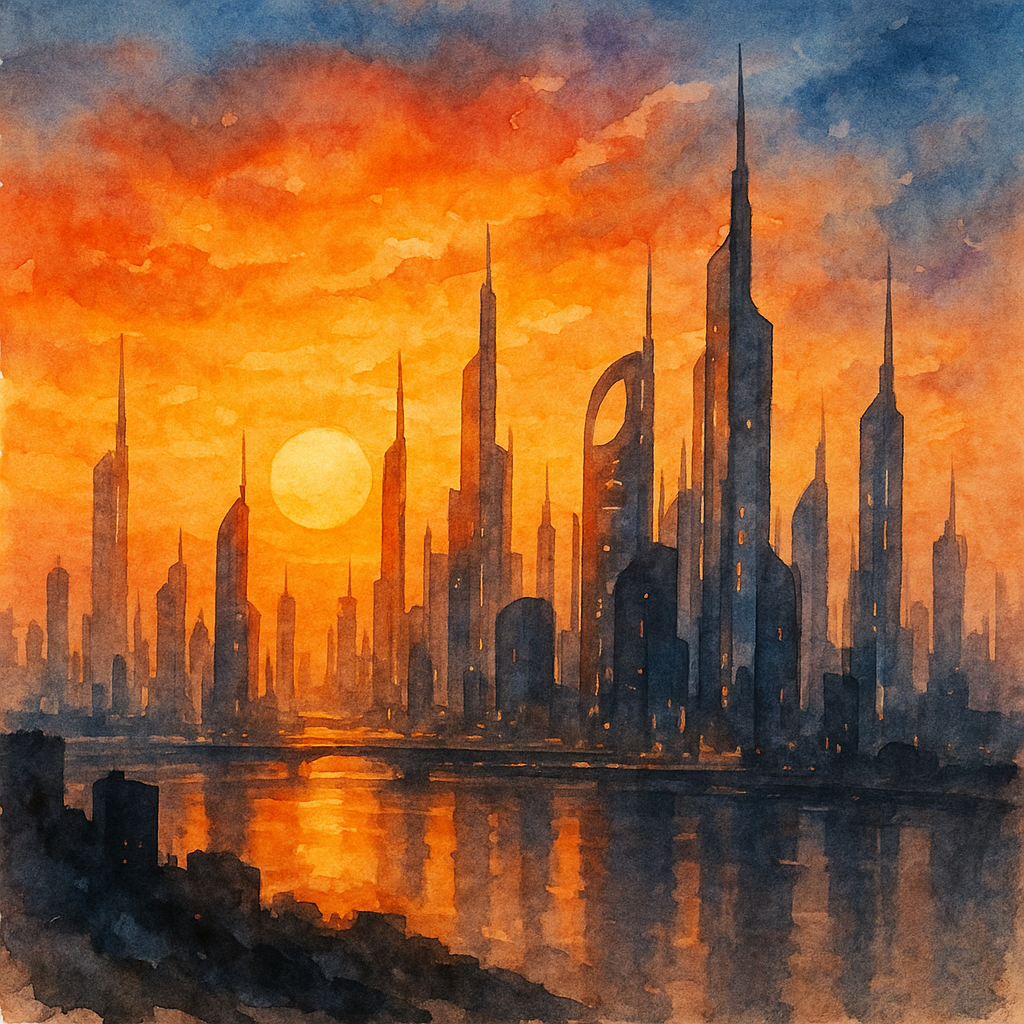

🖼️ Image generated and displayed successfully!


In [24]:
import base64
from IPython.display import Image, display

# Generate an image from a text prompt
image_response = client.images.generate(
    model="gpt-image-1",
    prompt="A futuristic city skyline at sunset, painted in watercolor style",
    size="1024x1024"  # you can use '1024x1024', '1024x1536', '1536x1024', and 'auto'
)

# Extract the base64-encoded image and display it
image_base64 = image_response.data[0].b64_json
image_bytes = base64.b64decode(image_base64)

# Save image locally (optional)
with open("generated_image.png", "wb") as f:
    f.write(image_bytes)

# Display the image inline in the notebook
display(Image(data=image_bytes))
print("🖼️ Image generated and displayed successfully!")


### 🔊 Example 6 — Audio Generation
The API can also generate audios from text prompts.


In [25]:
import base64
from openai import OpenAI

client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o-audio-preview",
    modalities=["text", "audio"],
    audio={"voice": "alloy", "format": "wav"},
    messages=[
        {
            "role": "user",
            "content": "Is a golden retriever a good family dog?"
        }
    ]
)

# print(completion.choices[0])

wav_bytes = base64.b64decode(completion.choices[0].message.audio.data)
with open("dog.wav", "wb") as f:
    f.write(wav_bytes)

## ✅ Summary

In this notebook, you’ve learned how to:
- Load your API key securely from a `.env` file  
- Initialize the OpenAI client  
- List available models  
- Make chat-based API calls  
- Perform different tasks like summarization, Q&A, translation, and image generation